<a href="https://colab.research.google.com/github/cloud-vinny/Computing_Tech_Proj_Assignment/blob/main-project/Spam1_2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Independencies**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import numpy as np


In [2]:
# Google Colab drive mounting not needed for local execution
# from google.colab import drive
# drive.mount('/content/drive')

# **Import dataset**

In [3]:
# Load external dataset (ham/spam labels) dataset 2
df2 = pd.read_csv("dataset/spam.csv", encoding="latin-1")
# Keep useful columns
df2 = df2[['v1','v2']]
# rename fields
df2 = df2.rename(columns={'v1': 'spam', 'v2': 'text'})
# Convert labels ham/spam -> 0/1
df2['spam'] = df2['spam'].map({'ham':0, 'spam':1})
print(df2.shape)
df2.head()

(5572, 2)


,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df1 = pd.read_csv("dataset/emails.csv")
print(df1.shape)
df1.head()

(5728, 2)


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


# **Merging datasets**

In [5]:
# Merge with new dataset
df = pd.concat([df1, df2], ignore_index=True)

# Remove duplicates
df = df.drop_duplicates(subset='text').reset_index(drop=True)

# Check final result
print("Final merged dataset shape:", df.shape)
print(df['spam'].value_counts())

# shuffle the data
df = df.sample(frac=1).reset_index(drop=True)
print(df.head(20))

Final merged dataset shape: (10864, 2)
spam
0    8843
1    2021
Name: count, dtype: int64
                                                 text  spam
0      Ok anyway no need to change with what you said     0
1   Subject: erisk iconference 4 / 11 / 2001  plea...     0
2    cool. We will have fun practicing making babies!     0
3   Subject: re : hello from vince kaminski at enr...     0
4   Subject: restricted list  neither ena / rac / ...     0
5                             I am sorry it hurt you.     0
6   Subject: personal time on tuesday , nov . 21 ,...     0
7   Subject: greatest online prescripiton here  ni...     1
8                   Sorry da thangam.it's my mistake.     0
9   Do you hide anythiing or keeping distance from me     0
10  Subject: 2 missing from the mailing list  hing...     0
11     Just come home. I don't want u to be miserable     0
12  Subject: june 21 - 22 retail electricity confe...     0
13                            K:)k:)good:)study well.     0
14  its co

In [6]:
df.sample(20)

,text,spam
8915,Have a good trip. Watch out for . Remember whe...,0
7747,It vl bcum more difficult..,0
9825,"Subject: logo , stationer , website design and...",1
8052,ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...,0
6254,"Subject: fyi : forward hi vince , the follow...",0
9890,Nope i'll come online now..,0
3676,Subject: re : mission impossible - hr associat...,0
7553,Subject: spring 2001 module and calendar sched...,0
10051,Its posible dnt live in &lt;#&gt; century cm ...,0
2886,"Subject: re : ( no subject ) jana , "" cotton...",0


# **Data Cleaning**

In [7]:
#lowercase all the chars
df.text = df.text.str.lower()

In [8]:
# Clear and repeated word : "subject: " , "re :" , "fw :" , and "news :" .
df['text'] = df['text'].str.replace("subject: ", "", regex=True)
df['text'] = df['text'].str.replace("re : ", "", regex=True)
df['text'] = df['text'].str.replace("fw : ", "", regex=True)
df['text'] = df['text'].str.replace("news : ", "", regex=True)

df.sample(50)

,text,spam
8967,"invitation to speak at infocast ' s upcoming ""...",0
4548,lul im gettin some juicy gossip at the hospita...,0
9088,kent vale lor... ìï wait 4 me there ar?,0
74,benefits - personal days vince : is the foll...,0
6285,california power 1 / 19 / 00 executive summar...,0
9401,"enron / stanford program paul , thanks for p...",0
7543,where you. what happen,0
86,hmv bonus special 500 pounds of genuine hmv vo...,1
670,hi its kate can u give me a ring asap xxx,0
5559,"nah man, my car is meant to be crammed full of...",0


In [9]:
#checking if there's any missing value of both column
df.isnull().sum()

text    0
spam    0
dtype: int64

In [10]:
#checking if there's any duplicate in text column
df["text"].duplicated().sum()

np.int64(1)

In [11]:
# Remove the duplicate and keep the first one
df = df.drop_duplicates(keep="first")

In [12]:
# Checking the duplicated if it's removed
df.duplicated().sum()

np.int64(0)

# **Exploratory Data Analysis (EDA)**

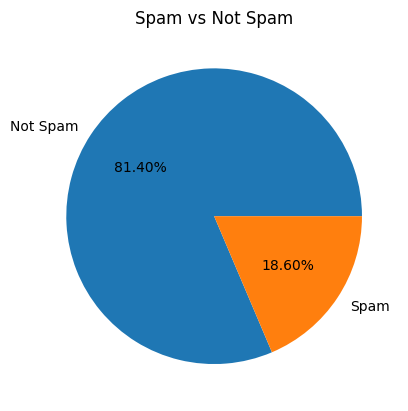

In [13]:
counts = df['spam'].value_counts()
label_map = {1: 'Spam', 0: 'Not Spam'}
labels = [label_map[i] for i in counts.index]

plt.pie(counts,labels=labels,autopct='%0.2f%%')
plt.title('Spam vs Not Spam')
plt.show()
# result shows of imbalance df between not spam and spam

In [14]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cloud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\cloud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
# Tokenization
df['num_chars']=df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sen10'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,text,spam,num_chars,num_words,num_sen10
0,ok anyway no need to change with what you said,0,46,10,1
1,erisk iconference 4 / 11 / 2001 please save t...,0,1739,355,38
2,cool. we will have fun practicing making babies!,0,48,10,2
3,"hello from vince kaminski at enron shmuel , ...",0,6868,1927,53
4,restricted list neither ena / rac / egf emplo...,0,3286,590,29


In [16]:
df[['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,10863.000000,10863.000000,10863.000000
mean,847.874620,179.076498,11.101169
std,1652.621015,339.805110,27.507231
min,2.000000,1.000000,1.000000
25%,63.000000,15.000000,1.000000
50%,209.000000,44.000000,4.000000
75%,1025.000000,221.000000,13.000000
max,43928.000000,8471.000000,1565.000000


In [17]:
# Not Spam
df[df['spam'] == 0 ][['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,8842.000000,8842.000000,8842.000000
mean,829.180389,176.868469,10.601335
std,1577.224923,327.835017,28.175488
min,2.000000,1.000000,1.000000
25%,51.000000,13.000000,1.000000
50%,158.000000,37.000000,3.000000
75%,1079.000000,232.000000,12.000000
max,43928.000000,8471.000000,1565.000000


In [18]:
# Spam
df[df['spam'] == 1 ][['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,2021.000000,2021.000000,2021.000000
mean,929.663038,188.736764,13.287976
std,1946.817412,387.798355,24.254574
min,9.000000,2.000000,1.000000
25%,156.000000,31.000000,3.000000
50%,403.000000,80.000000,7.000000
75%,915.000000,202.000000,13.000000
max,28418.000000,6128.000000,438.000000


<Axes: xlabel='num_chars', ylabel='Count'>

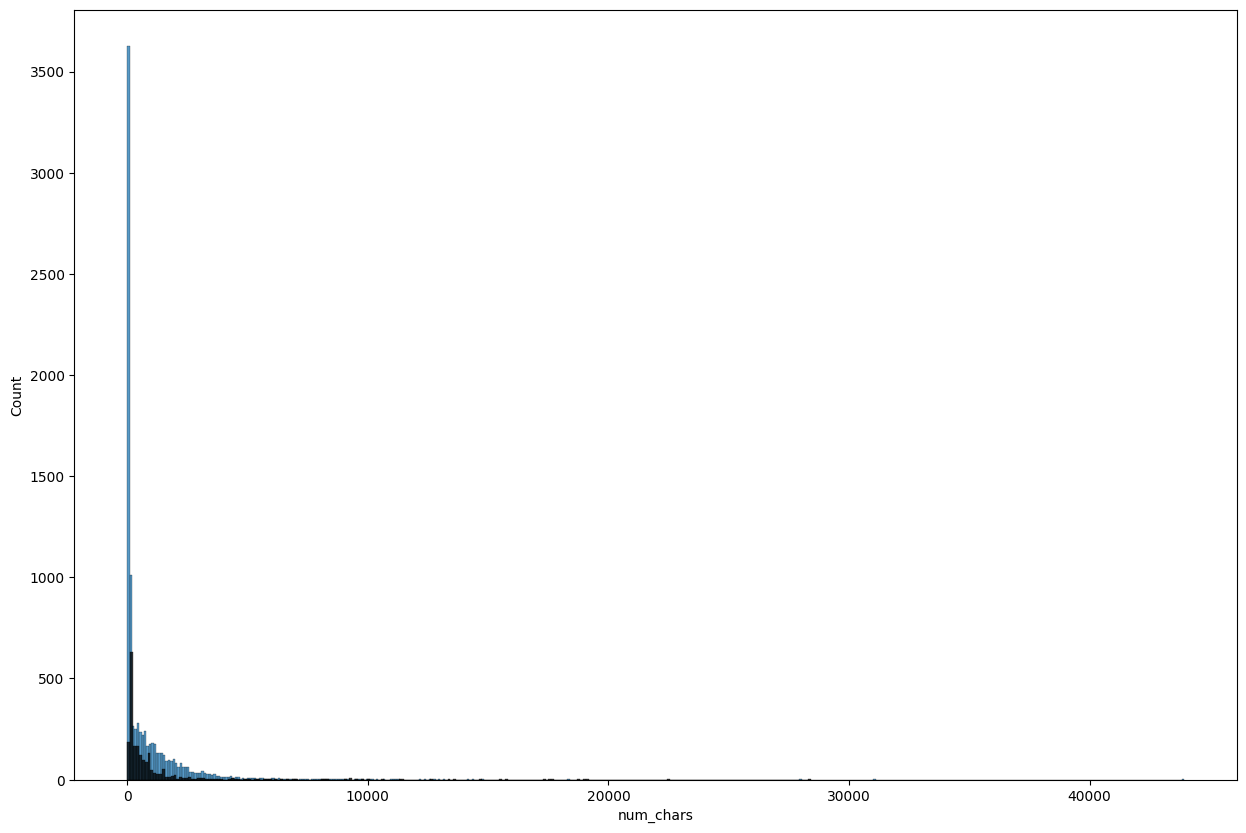

In [19]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_chars'])
sns.histplot(df[df['spam'] == 1]['num_chars'], color="black")

<Axes: xlabel='num_chars', ylabel='Count'>

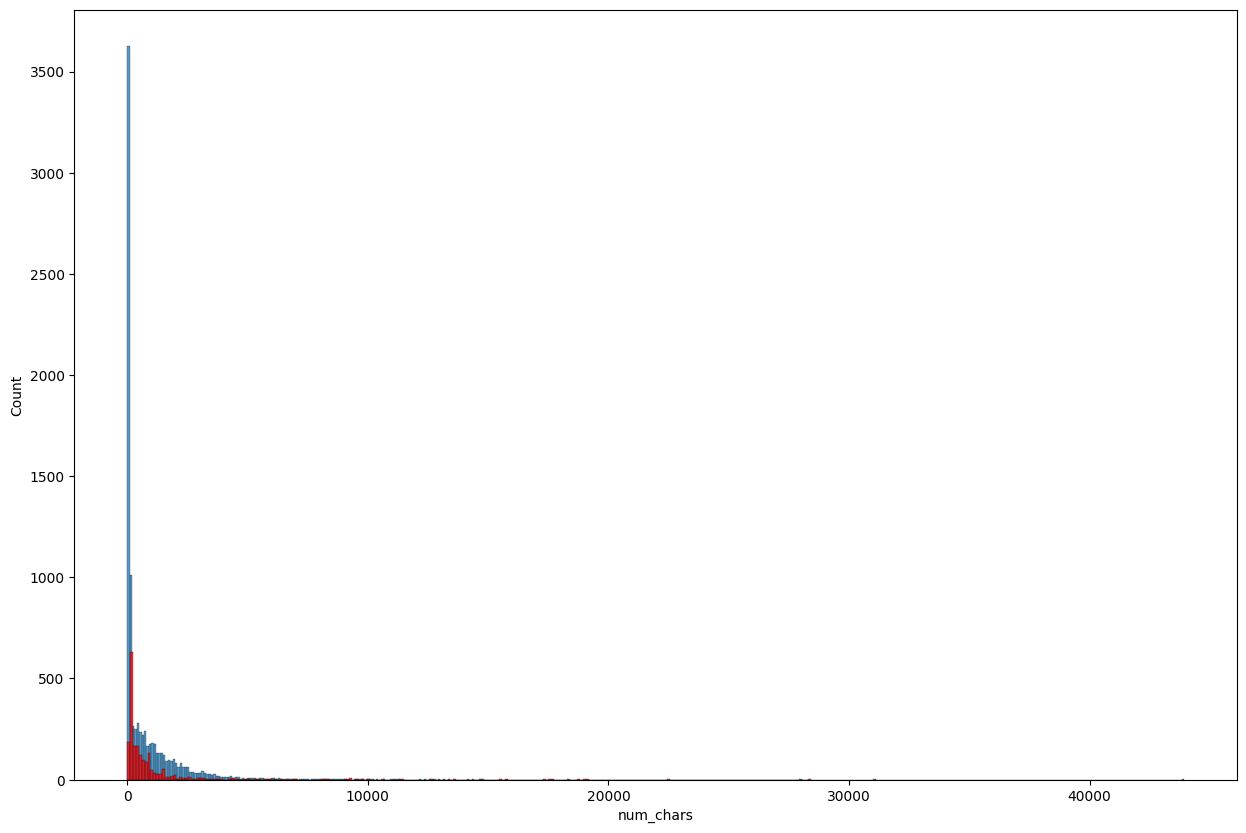

In [20]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_chars'])
sns.histplot(df[df['spam'] == 1]['num_chars'], color="red")

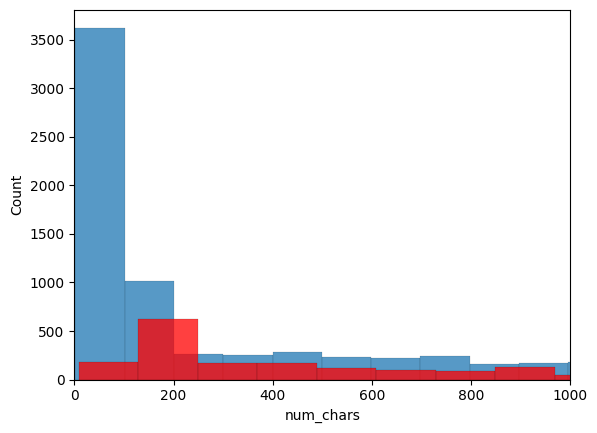

In [21]:
# Spam and snot spam zoom in visualization
sns.histplot(df[df['spam'] == 0]['num_chars'])

# red color = spam
sns.histplot(df[df['spam'] == 1]['num_chars'], color="red")
plt.xlim(0, 1000)   # zoom in
plt.show()


<Axes: xlabel='num_sen10', ylabel='Count'>

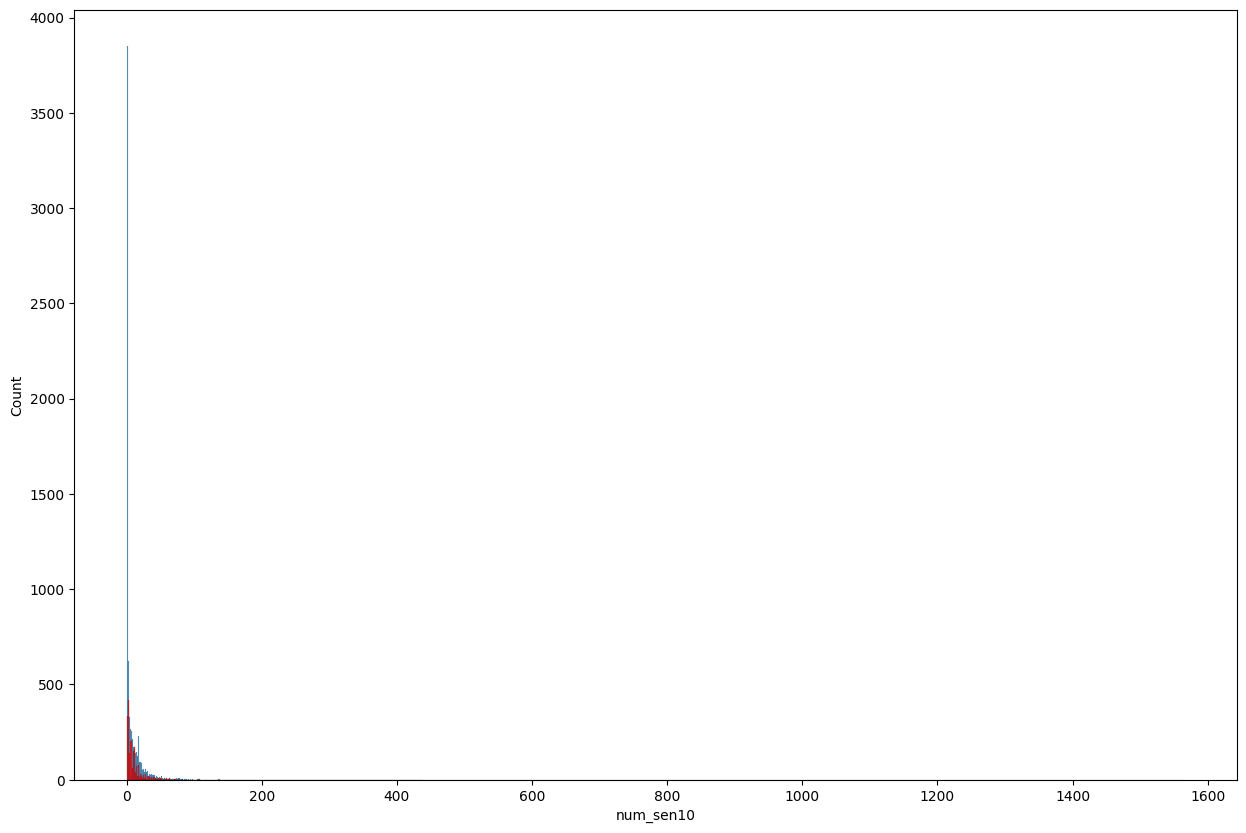

In [22]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_sen10'])
sns.histplot(df[df['spam'] == 1]['num_sen10'], color="red")

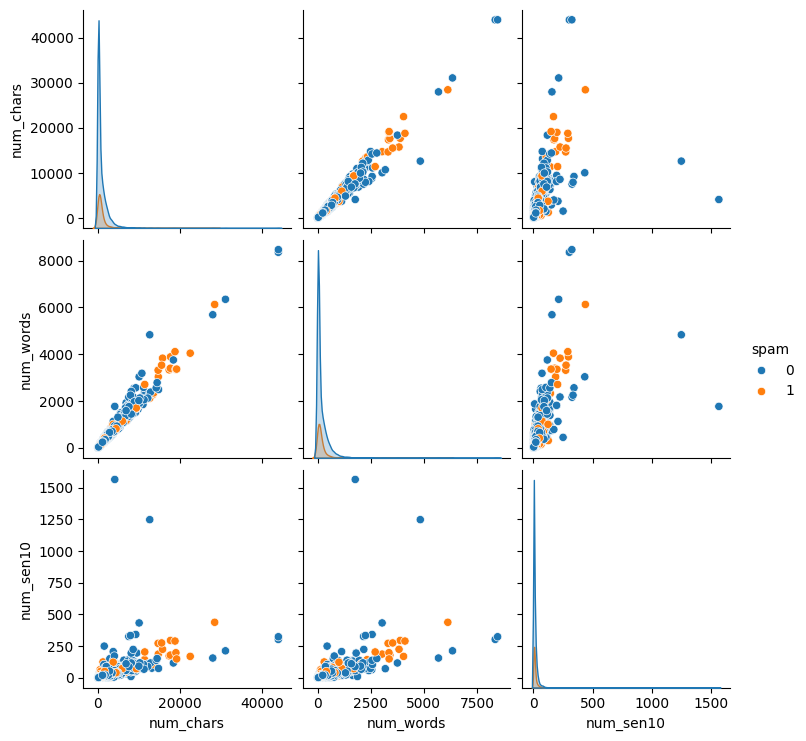

In [23]:
sns.pairplot(df,hue='spam')

In [24]:
# Correlation
corr = df.select_dtypes(include=['number']).corr()
print(corr)

               spam  num_chars  num_words  num_sen10
spam       1.000000   0.023662   0.013592   0.038009
num_chars  0.023662   1.000000   0.988856   0.647457
num_words  0.013592   0.988856   1.000000   0.702594
num_sen10  0.038009   0.647457   0.702594   1.000000


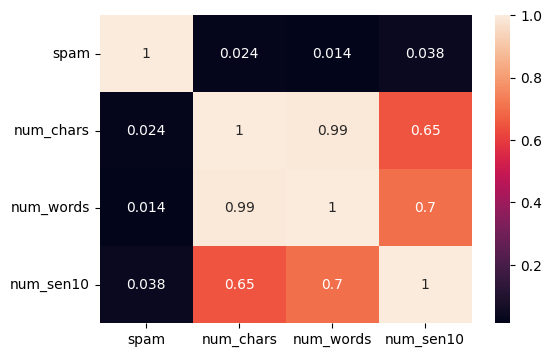

In [25]:
# Heat Map
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True)
plt.show()

# **Data Preprocessing**


In [26]:
nltk.download('stopwords')
import string
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cloud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
from nltk.stem.porter import PorterStemmer
#Stemming method
ps = PorterStemmer()
ps.stem('cooking')

'cook'

**Text Transform Function for Input**

In [28]:
def text_transform(text):
  text = text.lower() #lowercase
  text = nltk.word_tokenize(text) #tokenize

  # remove special chars & stopwords & punctuation & stemming
  b = []
  for a in text:
    if a.isalnum() and a not in stopwords.words('english') and a not in string.punctuation:
      b.append(ps.stem(a))

  return " ".join(b)

In [29]:
# text = df['text'][500]
text = "I loved to play basketball and watching anime. How about you? bro"
text_transform(text)

'love play basketbal watch anim bro'

In [30]:
df["preprocessed_text"] = df['text'].apply(text_transform)
df.head(10)

,text,spam,num_chars,num_words,num_sen10,preprocessed_text
0,ok anyway no need to change with what you said,0,46,10,1,ok anyway need chang said
1,erisk iconference 4 / 11 / 2001 please save t...,0,1739,355,38,erisk iconfer 4 11 2001 pleas save e mail cont...
2,cool. we will have fun practicing making babies!,0,48,10,2,cool fun practic make babi
3,"hello from vince kaminski at enron shmuel , ...",0,6868,1927,53,hello vinc kaminski enron shmuel sorri get bac...
4,restricted list neither ena / rac / egf emplo...,0,3286,590,29,restrict list neither ena rac egf employe fami...
5,i am sorry it hurt you.,0,23,7,1,sorri hurt
6,"personal time on tuesday , nov . 21 , 2000 sh...",0,969,206,10,person time tuesday nov 21 2000 shirley remind...
7,greatest online prescripiton here nicaragua c...,1,276,45,6,greatest onlin prescripiton nicaragua closur t...
8,sorry da thangam.it's my mistake.,0,33,7,1,sorri da mistak
9,do you hide anythiing or keeping distance from me,0,49,9,1,hide anythi keep distanc


In [31]:
# Cleaned again for the column['preprocessed_text']

df = df.drop_duplicates(subset='preprocessed_text', keep='first')
df['preprocessed_text'].duplicated().sum()
df.dropna(inplace=True)
df['preprocessed_text'].isnull().sum()

C:\Users\cloud\AppData\Local\Temp\ipykernel_16464\2116524652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


np.int64(0)

**Save the Cleaned and Preprocessed Dataset**

In [32]:
# Double check if null or duplicated
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [33]:
df_clean = df.copy()

In [34]:
#save the current dataset
df_clean.to_csv("dataset/cleaned_dataset.csv", index=False)

**Spam & Non Spam Text Most_Common_Count and Visualize**

In [35]:
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_spam/cleaned_dataset.csv")

In [36]:
from wordcloud import WordCloud

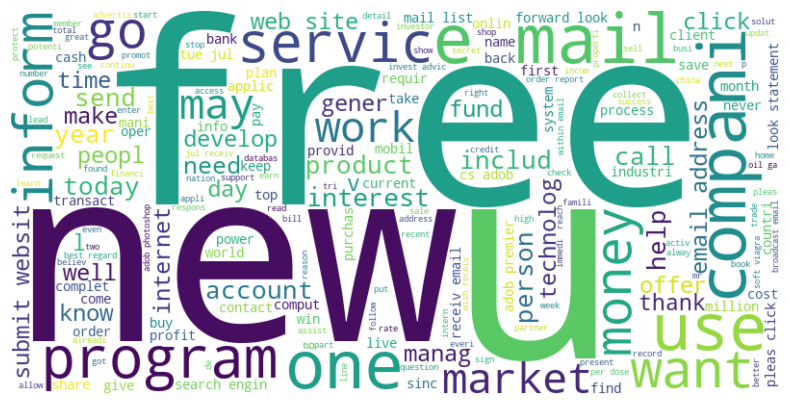

In [37]:
# Generate word cloud only for spam messages
wc = WordCloud(width=800, height=400, background_color='white')
spam_wc = wc.generate(df[df['spam'] == 1]['preprocessed_text'].str.cat(sep=" "))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

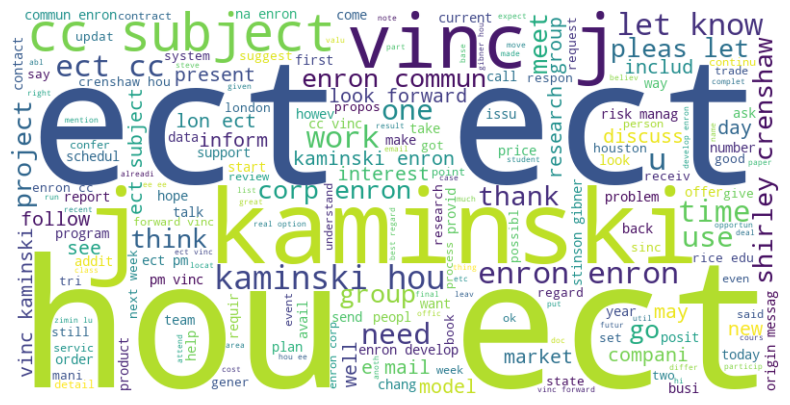

In [38]:
# Generate word cloud only for non spam messages
non_spam_wc = wc.generate(df[df['spam'] == 0]['preprocessed_text'].str.cat(sep=" "))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
spam_corpus = []
for msg in df[df['spam'] == 1]['preprocessed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
len(spam_corpus)

182513

In [40]:
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,compani,1067
1,com,999
2,1,978
3,mail,917
4,busi,896
5,email,866
6,inform,827
7,free,786
8,get,766
9,2,761


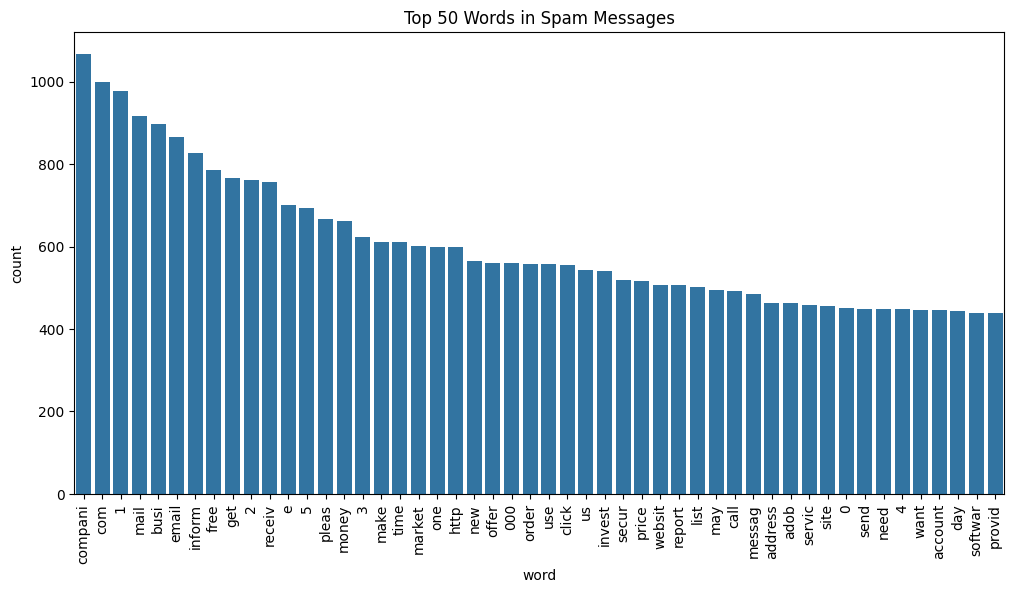

In [41]:
spam_word_counts = Counter(spam_corpus).most_common(50)
df_swc = pd.DataFrame(spam_word_counts, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_swc)
plt.xticks(rotation='vertical')
plt.title("Top 50 Words in Spam Messages")
plt.show()

In [42]:
df[df['spam'] == 0]['preprocessed_text']

0                                ok anyway need chang said
1        erisk iconfer 4 11 2001 pleas save e mail cont...
2                               cool fun practic make babi
3        hello vinc kaminski enron shmuel sorri get bac...
4        restrict list neither ena rac egf employe fami...
                               ...                        
10857    decemb 15 th super saturday friday interview c...
10858             ugh long day exhaust want cuddl take nap
10860    friendship game play word say start march end ...
10862    sound like could lot time spent chastiti devic...
10863    remind dinner saturday dec 2 nd remind dinner ...
Name: preprocessed_text, Length: 8607, dtype: object

In [43]:
non_spam_corpus = []
for msg in df[df['spam'] == 0]['preprocessed_text'].tolist():
  if isinstance(msg, str): # Check if the message is a string
    for word in msg.split():
      non_spam_corpus.append(word)

len(non_spam_corpus)

702447

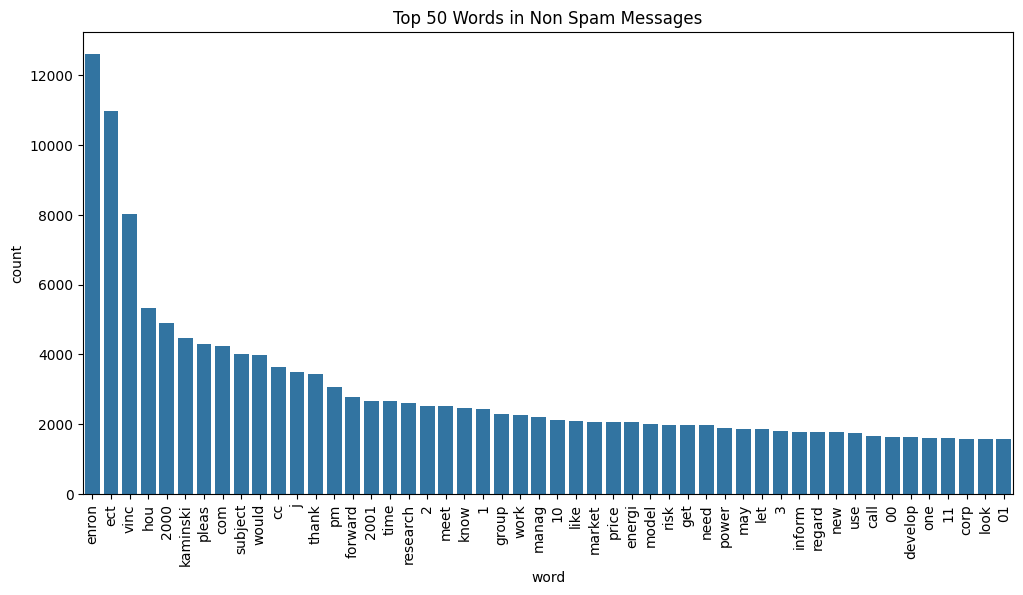

In [44]:
n_spam_word_counts = Counter(non_spam_corpus).most_common(50)
df_nswc = pd.DataFrame(n_spam_word_counts, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_nswc)
plt.xticks(rotation='vertical')
plt.title("Top 50 Words in Non Spam Messages")
plt.show()

# **Model Building**

**Indenpendencies for Model**

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#dataset spliting
from sklearn.model_selection import train_test_split
#Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
#Evvaluation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, roc_auc_score, classification_report, adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from scipy.stats import mode
from scipy.optimize import linear_sum_assignment
# Balance Data method
from imblearn.over_sampling import RandomOverSampler

In [46]:
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X = tfidf.fit_transform(df['preprocessed_text']).toarray()

ros = RandomOverSampler(random_state=2)

In [47]:
X.shape

(10598, 3000)

In [48]:
y = df['spam'].values
y

array([0, 0, 0, ..., 1, 0, 0], shape=(10598,))

***Spliting Train = 75% and Test = 25%***

In [49]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.25, random_state=42)
#Balance the dataset
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

# ***Training Part***

**MultinomialNB**

In [50]:
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train_bal, y_train_bal)

,alpha,0.1
,force_alpha,True
,fit_prior,True
,class_prior,None


**LogisticRegression**

In [51]:
clf = LogisticRegression(max_iter=300, class_weight='balanced', n_jobs=None)
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'


**K-Means**

In [52]:
kmeans= KMeans(n_clusters=2,random_state=2)
kmeans.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,2
,copy_x,True
,algorithm,'lloyd'


# **Evaluation**

In [53]:
# MultinomialNB

y_pred = mnb.predict(X_test)
y_prob = mnb.predict_proba(X_test)[:,1]   # probability for spam

# Evaluate
print("Accuracy      :", accuracy_score(y_test, y_pred))
print("Precision     :", precision_score(y_test, y_pred))
print("Recall        :", recall_score(y_test, y_pred))
print("F1-Score      :", f1_score(y_test, y_pred))
print("ROC-AUC       :", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nDetailed Report:\n", classification_report(y_test, y_pred))

Accuracy      : 0.9150943396226415
Precision     : 0.6964809384164223
Recall        : 0.9634888438133874
F1-Score      : 0.8085106382978723
ROC-AUC       : 0.9877929398223247
Confusion Matrix:
 [[1950  207]
 [  18  475]]

Detailed Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.95      2157
           1       0.70      0.96      0.81       493

    accuracy                           0.92      2650
   macro avg       0.84      0.93      0.88      2650
weighted avg       0.94      0.92      0.92      2650



In [54]:
# Logistic Regression

y_pred2 = clf.predict(X_test)
y_prob2 = clf.predict_proba(X_test)[:,1]

# Evaluate (same metrics)
print("Accuracy      :", accuracy_score(y_test, y_pred2))
print("Precision     :", precision_score(y_test, y_pred2))
print("Recall        :", recall_score(y_test, y_pred2))
print("F1-Score      :", f1_score(y_test, y_pred2))
print("ROC-AUC       :", roc_auc_score(y_test, y_prob2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Accuracy      : 0.960377358490566
Precision     : 0.8632958801498127
Recall        : 0.9350912778904665
F1-Score      : 0.8977604673807206
ROC-AUC       : 0.9895636735342547
Confusion Matrix:
 [[2084   73]
 [  32  461]]


In [55]:
# K-Means Clustering

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['preprocessed_text'])

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)

y_true = df['spam'].astype(int).values          # assumes ground-truth in 'spam'
y_cluster = kmeans.labels_

# Use Hungarian algorithm to best match clusters to classes
cont = pd.crosstab(y_true, y_cluster)
row_ind, col_ind = linear_sum_assignment(-cont.values)     # maximise matches
cluster_map = {cont.columns[j]: cont.index[i] for i, j in zip(row_ind, col_ind)}

# Apply mapping to get predicted class labels
y_pred = np.vectorize(cluster_map.get)(y_cluster)

print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, digits=3))
print("Accuracy:", accuracy_score(y_true, y_pred))


Confusion Matrix:
 [[6735 1872]
 [1991    0]]
              precision    recall  f1-score   support

           0      0.772     0.783     0.777      8607
           1      0.000     0.000     0.000      1991

    accuracy                          0.635     10598
   macro avg      0.386     0.391     0.389     10598
weighted avg      0.627     0.635     0.631     10598

Accuracy: 0.6354972636346481


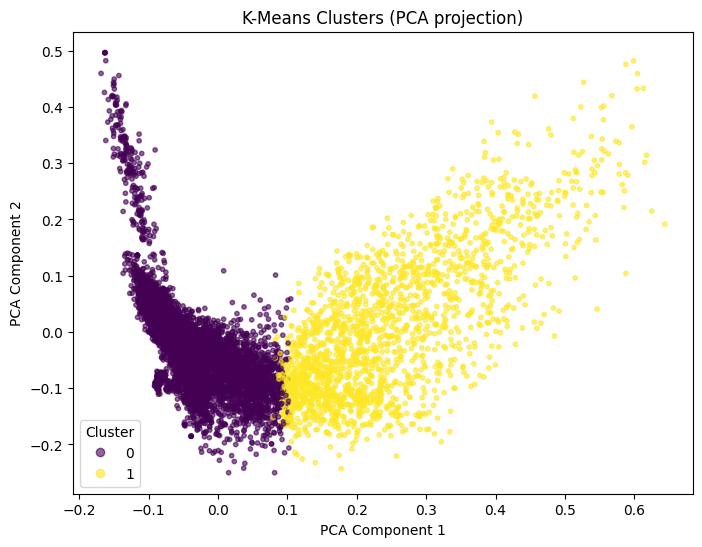

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X.toarray())      # X is the TF-IDF matrix

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_2d[:,0], X_2d[:,1],
    c=y_cluster,
    cmap='viridis', alpha=0.6, s=10
)
plt.title("K-Means Clusters (PCA projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

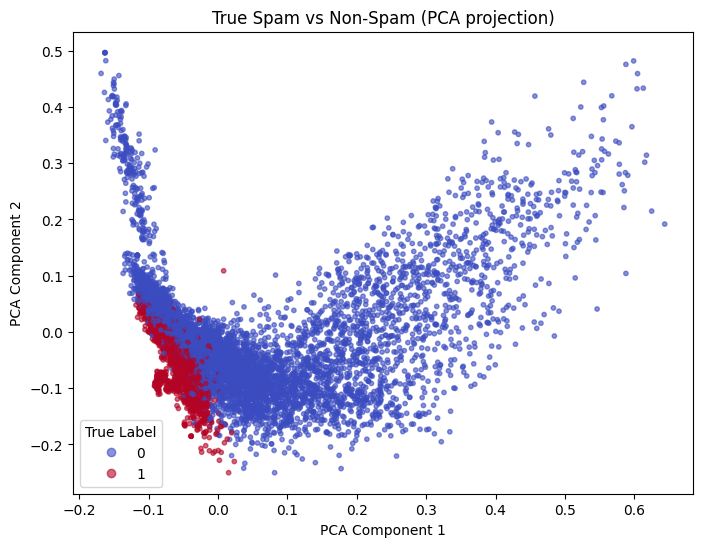

In [57]:
plt.figure(figsize=(8,6))
scatter2 = plt.scatter(
    X_2d[:,0], X_2d[:,1],
    c=y_true,                   # colour by actual labels
    cmap='coolwarm', alpha=0.6, s=10
)
plt.title("True Spam vs Non-Spam (PCA projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter2.legend_elements(), title="True Label")
plt.show()

**The Best Performance among three algorithm**  
> **CLF (Logistic Regression)**  

Therefore, I'm gonna use **CLF** for the test case.


***TESTING MODEL PREDICTION***



In [58]:
num = 1020
mess = df['text'][num]
print(f'Message: "{mess}"')

# Apply your preprocessing
mess = text_transform(mess)

# Convert to vector (same as training!)
mess_vec = tfidf.transform([mess])

#actual
actual = df['spam'][num]
if actual == 1:
  print("Actual: SPAM " )
else:
  print("Prediction: NON SPAM ")


# Predict
prediction = clf.predict(mess_vec)

if prediction == 1:
  print("Prediction: SPAM " )
else:
  print("Prediction: NON SPAM ")


Message: "dude avatar 3d was imp. at one point i thought there were actually flies in the room and almost tried hittng one as a reflex"
Prediction: NON SPAM 
Prediction: NON SPAM 


**TestCase Example1**

In [59]:
# Example test message
mess = "Congratulations! You have WON a $500 gift card. Click here to claim your prize now!"
print(f'Message: \"{mess}\"')

# Apply preprocessing
mess_clean = text_transform(mess)

# Vectorise using the same fitted TF-IDF
mess_vec = tfidf.transform([mess_clean])

prediction = clf.predict(mess_vec)[0]

# Predict probability for each class
proba = clf.predict_proba(mess_vec)[0]   # returns array like [P(non-spam), P(spam)]

print(f"Probability of NON-SPAM: {proba[0]*100:.2f}%")
print(f"Probability of SPAM    : {proba[1]*100:.2f}%")

# Final label
if prediction == 1:
    print("Predicted label: SPAM")
else:
    print("Predicted label: NON-SPAM")

Message: "Congratulations! You have WON a $500 gift card. Click here to claim your prize now!"
Probability of NON-SPAM: 3.24%
Probability of SPAM    : 96.76%
Predicted label: SPAM


**TestCase Example2**

In [60]:
mess = "Hi John, I’ll meet you at the cafe at 3pm tomorrow for our project discussion."

print(f'Message: \"{mess}\"')
mess_clean = text_transform(mess)
mess_vec = tfidf.transform([mess_clean])
prediction = clf.predict(mess_vec)[0]
proba = clf.predict_proba(mess_vec)[0]
print(f"Probability of NON-SPAM: {proba[0]*100:.2f}%")
print(f"Probability of SPAM    : {proba[1]*100:.2f}%")
if prediction == 1:
    print("Predicted label: SPAM")
else:
    print("Predicted label: NON-SPAM")

Message: "Hi John, I’ll meet you at the cafe at 3pm tomorrow for our project discussion."
Probability of NON-SPAM: 98.05%
Probability of SPAM    : 1.95%
Predicted label: NON-SPAM


**TestCase Example3**

In [61]:
test_messages = [
    "You’ve been selected for a limited-time loan offer! Apply today and get cash instantly — click the link now.",
    "Hey Sarah, just checking if you’re free for lunch tomorrow at the new Italian restaurant.",
    "Congratulations 🎉! You’re our lucky winner of a free iPhone 15. Claim your prize before midnight!",
    "Meeting reminder: Don’t forget the team call at 10 AM tomorrow. Please join the Zoom link on time.",
    "URGENT: Your bank account has been locked. Verify your details immediately to avoid suspension."
]

# Create a list to store the cleaned messages
mess_clean = []

for i, msg in enumerate(test_messages):
    print(f"\nMessage {i+1}: {msg}")
    cleaned = text_transform(msg)
    mess_clean.append(cleaned)

    vec = tfidf.transform([cleaned])
    proba = clf.predict_proba(vec)[0]
    pred = clf.predict(vec)[0]

    print(f"Probability NON-SPAM: {proba[0]*100:.2f}%")
    print(f"Probability SPAM    : {proba[1]*100:.2f}%")
    print("Predicted Label:", "SPAM" if pred == 1 else "NON-SPAM")



Message 1: You’ve been selected for a limited-time loan offer! Apply today and get cash instantly — click the link now.
Probability NON-SPAM: 6.59%
Probability SPAM    : 93.41%
Predicted Label: SPAM

Message 2: Hey Sarah, just checking if you’re free for lunch tomorrow at the new Italian restaurant.
Probability NON-SPAM: 81.02%
Probability SPAM    : 18.98%
Predicted Label: NON-SPAM

Message 3: Congratulations 🎉! You’re our lucky winner of a free iPhone 15. Claim your prize before midnight!
Probability NON-SPAM: 7.28%
Probability SPAM    : 92.72%
Predicted Label: SPAM

Message 4: Meeting reminder: Don’t forget the team call at 10 AM tomorrow. Please join the Zoom link on time.
Probability NON-SPAM: 69.30%
Probability SPAM    : 30.70%
Predicted Label: NON-SPAM

Message 5: URGENT: Your bank account has been locked. Verify your details immediately to avoid suspension.
Probability NON-SPAM: 25.99%
Probability SPAM    : 74.01%
Predicted Label: SPAM


**User INPUT to Check Spam Detection**

Replace the text in ***mess variable*** of your choice to check the spam and non spam

In [62]:
#=================================================================

#Replace your text here to check
mess = "Congratulations! You have won $1,000,000 in our international lottery! To claim your prize, send us your bank details and personal information immediately. Limited time offer! Click here now!"

#=================================================================
print(f'Message: \"{mess}\"')
mess_clean = text_transform(mess)
mess_vec = tfidf.transform([mess_clean])
prediction = clf.predict(mess_vec)[0]
proba = clf.predict_proba(mess_vec)[0]
print(f"Probability of NON-SPAM: {proba[0]*100:.2f}%")
print(f"Probability of SPAM    : {proba[1]*100:.2f}%")
if prediction == 1:
    print("Predicted label: SPAM")
else:
    print("Predicted label: NON-SPAM")

Message: "Congratulations! You have won $1,000,000 in our international lottery! To claim your prize, send us your bank details and personal information immediately. Limited time offer! Click here now!"
Probability of NON-SPAM: 3.28%
Probability of SPAM    : 96.72%
Predicted label: SPAM
